# **Evaluation - Problem 1**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
import json

# select current working directory and subfolder to save the files
current_directory = os.getcwd()
subfolder_path = 'data'

# select file path for standardroutes
file_path = os.path.join(current_directory, subfolder_path, 'standard.json')
with open(file_path, 'r') as file:
    standardroutes = json.load(file) #yaml.safe_load(file)

# select file path for actual routes
file_path = os.path.join(current_directory, subfolder_path, 'actual.json')
with open(file_path, 'r') as file:
    actual_routes = json.load(file)

# # select file path for recommended standardroutes
# file_path = os.path.join(current_directory, subfolder_path, 'recStandard.json')
# with open(file_path, 'r') as file:
#     rec_standardroutes = json.load(file)

# run another notebook to load the function compute_similarities() to compute the similarity scores for each standardroute-actual-route-pair
# this notebook also runs the notebook for data generation to load the function show_route() to visualize routes which is part of the similarity score functions
%run "functions_similarity_score.ipynb"

Functions for data generation successfully loaded.
Functions for similarity score computations successfully loaded.


In [6]:
similarity_scores = compute_similarites(actual_routes=actual_routes, standardroutes=standardroutes, prints=False)

Processing:   0%|          | 0/100000 [00:00<?, ?iteration/s]

Processing: 100%|██████████| 100000/100000 [01:26<00:00, 1159.85iteration/s]



All scores successfully computed.
Mean similarity score: 0.7937


# **Original Standardroutes**

### **Analyse the similarity scores**

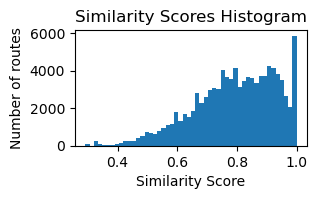

[{'id': 'a1', 'driver': 'B', 'sroute': 's1', 'score': 0.9440235690235691},
 {'id': 'a2', 'driver': 'C', 'sroute': 's1', 'score': 0.8851241351241351},
 {'id': 'a3', 'driver': 'E', 'sroute': 's1', 'score': 0.6766025641025641},
 {'id': 'a4', 'driver': 'E', 'sroute': 's1', 'score': 0.7957671957671958},
 {'id': 'a5', 'driver': 'B', 'sroute': 's1', 'score': 0.9393939393939394},
 {'id': 'a6', 'driver': 'E', 'sroute': 's1', 'score': 0.7280092592592593},
 {'id': 'a7', 'driver': 'C', 'sroute': 's1', 'score': 0.8599885777305132},
 {'id': 'a8', 'driver': 'H', 'sroute': 's1', 'score': 0.8166666666666668},
 {'id': 'a9', 'driver': 'E', 'sroute': 's1', 'score': 0.7812983312983314},
 {'id': 'a10', 'driver': 'C', 'sroute': 's1', 'score': 0.7879915052396947}]

In [7]:
# plot a histogram to show the distribution of the similarity scores between 0 and 1
values = np.array([i['score'] for i in similarity_scores])
plt.figure(figsize=(3, 1.5))
plt.hist(values, density=False, bins=50)
plt.ylabel('Number of routes')
plt.xlabel('Similarity Score')
plt.title('Similarity Scores Histogram')
plt.show()

# view first 10 combinations
similarity_scores[:10]

In [8]:
# check if any similarity is zero and view the combinations with less than 0.3 similarity score
print('Is any similarity score zero:', np.any(values == 0))
#display([i for i in values if i < 0.3][:10])

# view the combination with the lowest similarity score
idx_min = np.argmin(values)
lowest_score = [i for i in similarity_scores if i['id'] == str('a' + str(idx_min+1))][0]
standardroute = [i for i in standardroutes if i['id'] == lowest_score['sroute']][0]
actual_route = [i for i in actual_routes if i['id'] == lowest_score['id']][0]
print("\nLowest score by standardroute '{}' and actual route '{}' from driver '{}' with {} similarity.".format(standardroute['id'], actual_route['id'], actual_route['driver'], np.round(np.min(values), 4)))

# view details
#fun_similarity_score(route1=standardroute, route2=actual_route, prints=True)

Is any similarity score zero: False

Lowest score by standardroute 's4' and actual route 'a15049' from driver 'D' with 0.2917 similarity.


**View the similarity scores for each standardroute separately**


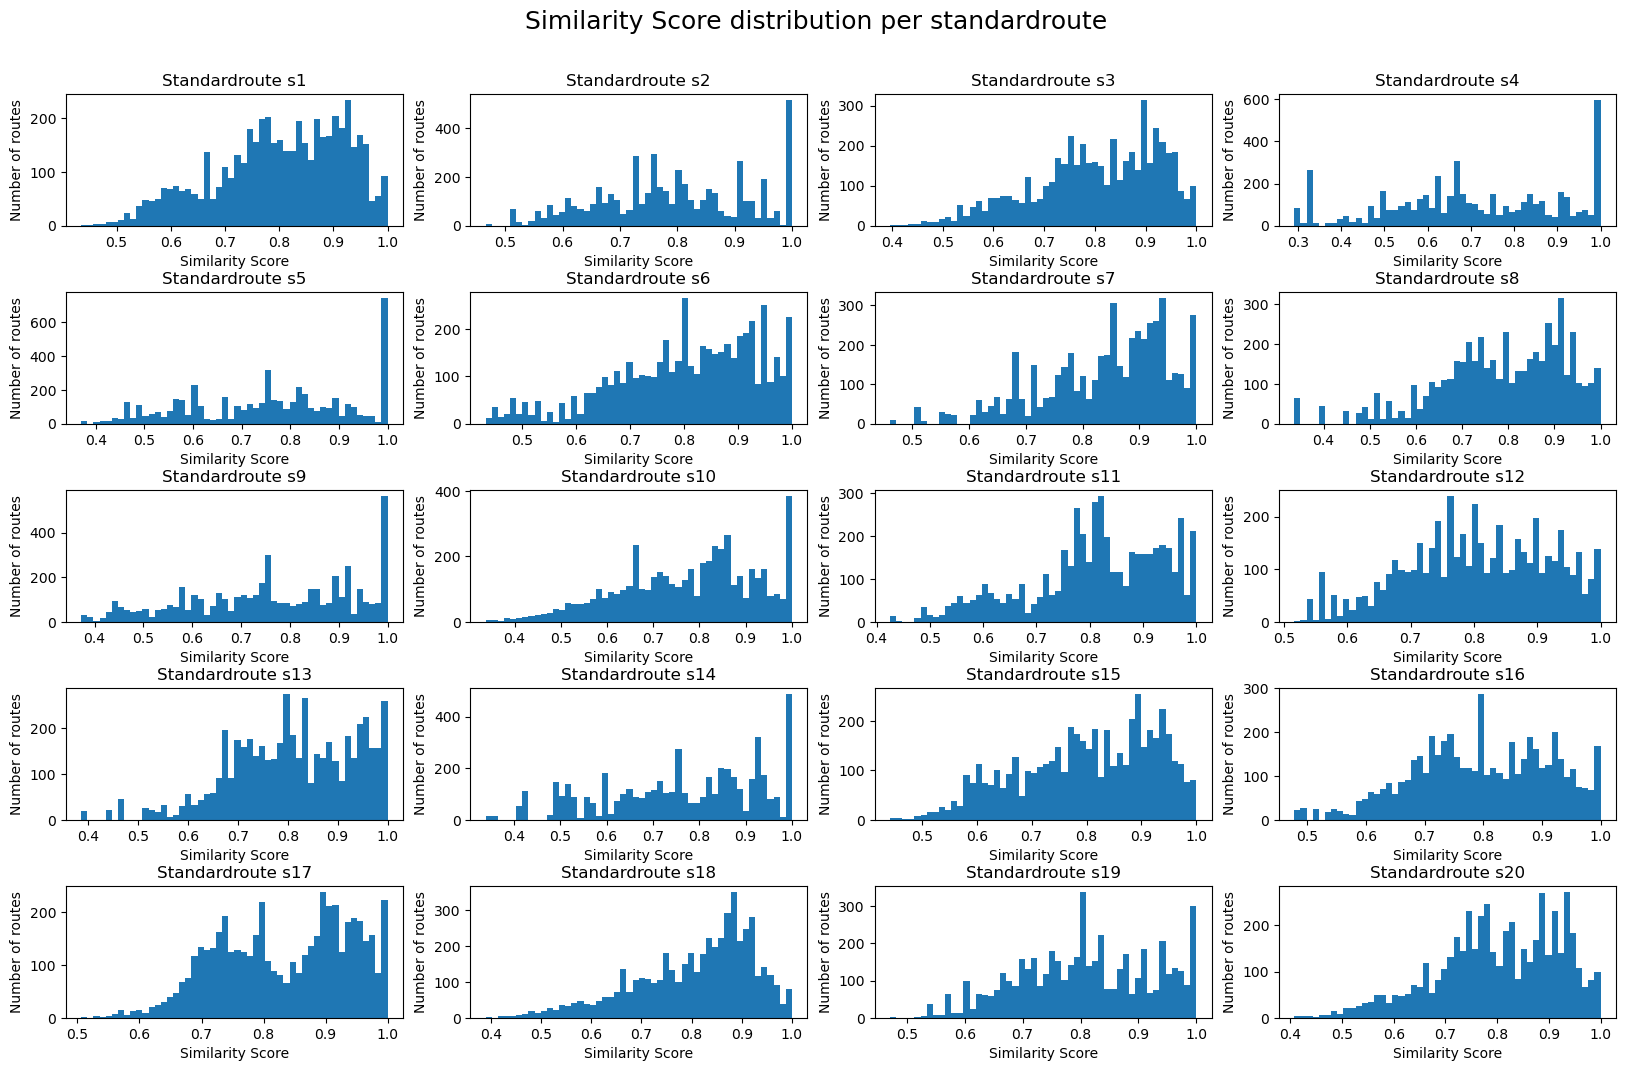

In [9]:
# plot a histogram for every standardroute to show the distribution
standardroute_ids = [i['id'] for i in standardroutes]

# define subplot grid
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Similarity Score distribution per standardroute", fontsize=18, y=0.95)

# loop through standardroutes and axes
for id, ax in zip(standardroute_ids, axs.ravel()):
    values = [i['score'] for i in similarity_scores if i['sroute'] == id]
    ax.hist(values, density=False, bins=50)
    ax.set_ylabel('Number of routes')
    ax.set_xlabel('Similarity Score')
    ax.set_title(f'Standardroute {id}')

plt.show()

**View the similarity scores for each driver separately**

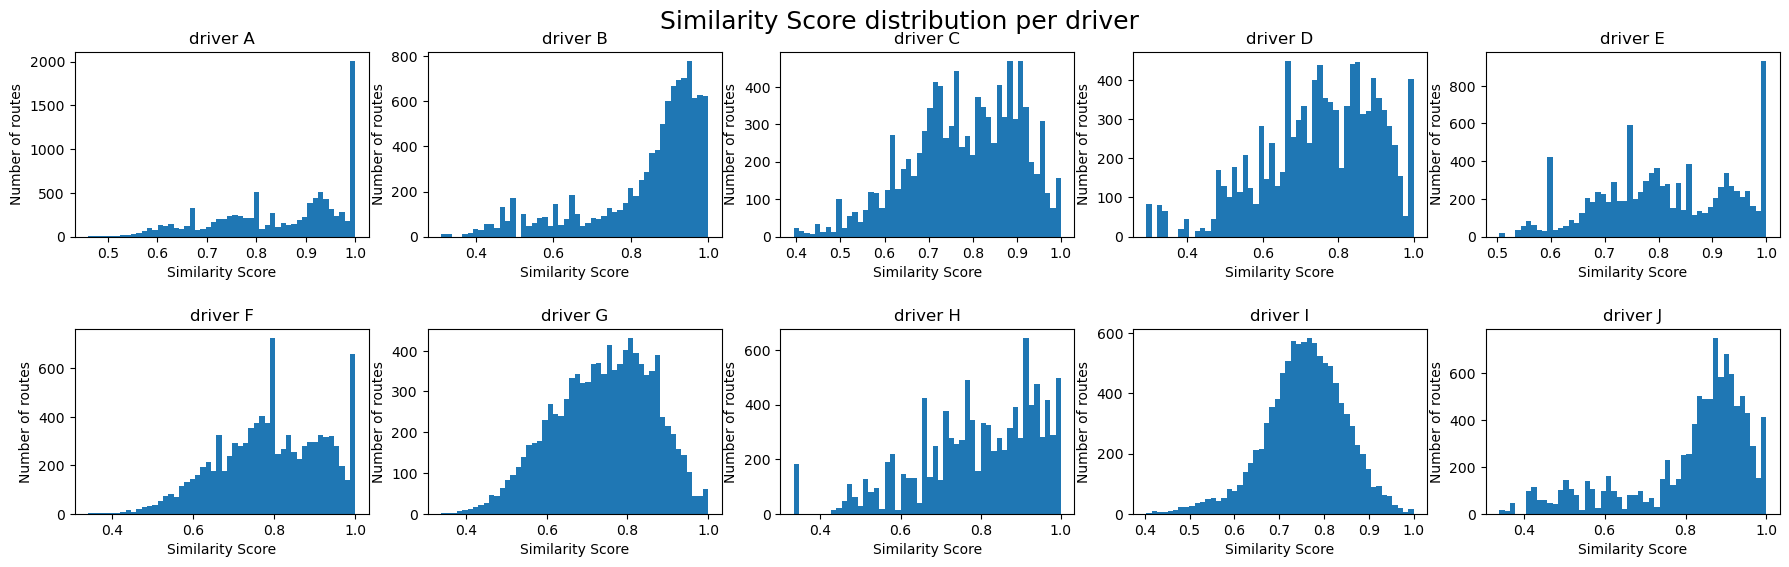

In [10]:
# plot a histogram for every driver to show the distribution
drivers = np.sort(list(set([i['driver'] for i in actual_routes])))

# define subplot grid
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(22, 6))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Similarity Score distribution per driver", fontsize=18, y=0.95)

# loop through drivers and axes
for driver, ax in zip(drivers, axs.ravel()):
    values = [i['score'] for i in similarity_scores if i['driver'] == driver]
    ax.hist(values, density=False, bins=50)
    ax.set_ylabel('Number of routes')
    ax.set_xlabel('Similarity Score')
    ax.set_title(f'driver {driver}')

plt.show()

In [ ]:
#sys.exit()

# **Recommended Standardroutes**

In [11]:
#rec_standardroutes

### **Analyse the similarity scores**

**View the similarity scores for each standardroute separately**


**View the similarity scores for each driver separately**